In [1]:
# Sentiment Analysis on IMDb data using CNN.  Comparison of Keras and MXNet implementation
import numpy
from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence

# Import MXNet related libaries
import mxnet as mx
import logging

logger = logging.getLogger()
logger.setLevel(logging.DEBUG)


# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)


Using TensorFlow backend.


In [33]:
# load the dataset but only keep the top n words, zero the rest
top_words = 5000
(X_train, y_train), (X_test, y_test) = imdb.load_data(nb_words=top_words)
# pad dataset to a maximum review length in words
max_words = 500
X_train = sequence.pad_sequences(X_train, maxlen=max_words)
X_test = sequence.pad_sequences(X_test, maxlen=max_words)


# Create MXNet NDArray Iterators from numpy datasets for MXNet training later


trainIter = mx.io.NDArrayIter(X_train, y_train, 128, shuffle=True)
testIter = mx.io.NDArrayIter(X_test, y_test, 128, shuffle=True)



(25000, 500)
[DataDesc[data,(128, 500),<class 'numpy.float32'>,NCHW]]
[DataDesc[softmax_label,(128,),<class 'numpy.float32'>,NCHW]]


In [36]:
# display some data
print (X_train.shape)
print (trainIter.provide_data)
print (trainIter.provide_label)

for batch in trainIter:
    print (batch.data)

(25000, 500)
[DataDesc[data,(128, 500),<class 'numpy.float32'>,NCHW]]
[DataDesc[softmax_label,(128,),<class 'numpy.float32'>,NCHW]]
[<NDArray 128x500 @cpu(0)>]
[<NDArray 128x500 @cpu(0)>]
[<NDArray 128x500 @cpu(0)>]
[<NDArray 128x500 @cpu(0)>]
[<NDArray 128x500 @cpu(0)>]
[<NDArray 128x500 @cpu(0)>]
[<NDArray 128x500 @cpu(0)>]
[<NDArray 128x500 @cpu(0)>]
[<NDArray 128x500 @cpu(0)>]
[<NDArray 128x500 @cpu(0)>]
[<NDArray 128x500 @cpu(0)>]
[<NDArray 128x500 @cpu(0)>]
[<NDArray 128x500 @cpu(0)>]
[<NDArray 128x500 @cpu(0)>]
[<NDArray 128x500 @cpu(0)>]
[<NDArray 128x500 @cpu(0)>]
[<NDArray 128x500 @cpu(0)>]
[<NDArray 128x500 @cpu(0)>]
[<NDArray 128x500 @cpu(0)>]
[<NDArray 128x500 @cpu(0)>]
[<NDArray 128x500 @cpu(0)>]
[<NDArray 128x500 @cpu(0)>]
[<NDArray 128x500 @cpu(0)>]
[<NDArray 128x500 @cpu(0)>]
[<NDArray 128x500 @cpu(0)>]
[<NDArray 128x500 @cpu(0)>]
[<NDArray 128x500 @cpu(0)>]
[<NDArray 128x500 @cpu(0)>]
[<NDArray 128x500 @cpu(0)>]
[<NDArray 128x500 @cpu(0)>]
[<NDArray 128x500 @cpu(0)>]


In [3]:
# USE Keras Framework

In [4]:
# create the model
model = Sequential()
model.add(Embedding(top_words, 32, input_length=max_words))

model.add(Conv1D(nb_filter=32, filter_length=3,  activation='relu'))  
model.add(MaxPooling1D(2))
model.add(Flatten())
model.add(Dense(250, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
embedding_1 (Embedding)          (None, 500, 32)       160000      embedding_input_1[0][0]          
____________________________________________________________________________________________________
convolution1d_1 (Convolution1D)  (None, 498, 32)       3104        embedding_1[0][0]                
____________________________________________________________________________________________________
maxpooling1d_1 (MaxPooling1D)    (None, 249, 32)       0           convolution1d_1[0][0]            
____________________________________________________________________________________________________
flatten_1 (Flatten)              (None, 7968)          0           maxpooling1d_1[0][0]             
___________________________________________________________________________________________

In [5]:
# Fit the model
#model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=2, batch_size=128, verbose=2)  # not sure why epochs is invalid

model.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=128, verbose=2)

# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Train on 25000 samples, validate on 25000 samples
Epoch 1/10
6s - loss: 0.4626 - acc: 0.7423 - val_loss: 0.2855 - val_acc: 0.8794
Epoch 2/10
4s - loss: 0.2309 - acc: 0.9085 - val_loss: 0.2857 - val_acc: 0.8817
Epoch 3/10
4s - loss: 0.1864 - acc: 0.9287 - val_loss: 0.3022 - val_acc: 0.8804
Epoch 4/10
4s - loss: 0.1543 - acc: 0.9425 - val_loss: 0.3561 - val_acc: 0.8693
Epoch 5/10
4s - loss: 0.1192 - acc: 0.9574 - val_loss: 0.3866 - val_acc: 0.8675
Epoch 6/10
4s - loss: 0.0889 - acc: 0.9703 - val_loss: 0.4550 - val_acc: 0.8678
Epoch 7/10
4s - loss: 0.0591 - acc: 0.9817 - val_loss: 0.5171 - val_acc: 0.8659
Epoch 8/10
4s - loss: 0.0371 - acc: 0.9905 - val_loss: 0.6241 - val_acc: 0.8638
Epoch 9/10
4s - loss: 0.0218 - acc: 0.9954 - val_loss: 0.6769 - val_acc: 0.8629
Epoch 10/10
4s - loss: 0.0126 - acc: 0.9984 - val_loss: 0.7550 - val_acc: 0.8624
Accuracy: 86.24%


In [6]:
# USE MXNET Framework

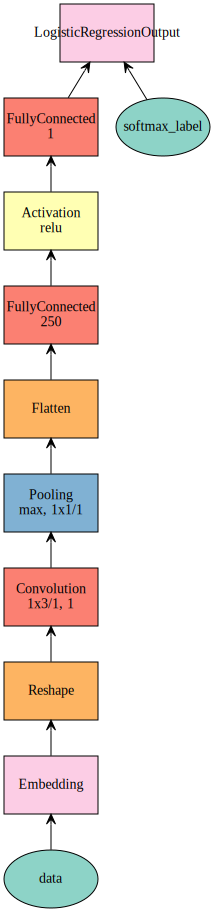

In [44]:
# Create MXNet CNN Network

NUM_FILTERS = 1  # this needs to same of number embedding vector size, so there is a filter for every single element(dimension)
VOCAB_SIZE = 5000


# define input data valuable and input label 
input_x = mx.sym.Variable('data')
input_y = mx.sym.Variable('softmax_label')  # placeholder for output label.  If not defined, it will automatically be name of layer + '_lable'

# Creating an embedding layer
# input_dim is the size of the vocaburary.  output_dim is the dimension of the output embedded vector.
Embeddata1 = mx.sym.Embedding(data = input_x, input_dim=VOCAB_SIZE, output_dim=32, name='embed') 

# add one more dimension as Conv layer expect 4D (batch size, filters, y dimention, x dimenstion)
reshapedata1 = mx.sym.Reshape(data=Embeddata1, shape=(128, 32, 1, 500))

# Create the first ConV layer
conv1 = mx.symbol.Convolution(data=reshapedata1, kernel=(1, 3), num_filter=NUM_FILTERS)

# Add max pooling layer
pool1 = mx.symbol.Pooling(data=conv1, pool_type="max", kernel=(1, 1), stride=(1, 1))

# Flatten the input data
flat_data1 = mx.sym.Flatten(data = pool1, name='flatten')

# Add a fully connected layer
fc1  = mx.sym.FullyConnected(data=flat_data1, num_hidden=250) 
act1 = mx.sym.Activation(data=fc1, act_type="relu") 

# Add another fully connected layer, with one hidden unit as this is binary classification
fc2 = mx.sym.FullyConnected(data=act1, num_hidden=1) 
act2 = mx.sym.Activation(data=fc2, act_type="sigmoid")  

cnn1 = mx.sym.LogisticRegressionOutput(data=fc2, label=input_y, name='softmax')

mx.viz.plot_network(cnn1)

In [45]:
# Fit the model

# define a stats function for monitoring
def norm_stat(d):
    """The statistics you want to see.
    We compute the L2 norm here but you can change it to anything you like."""
    return mx.nd.norm(d)/numpy.sqrt(d.size)


# create a trainable module on GPU 
batch_size = 128

cnn_model = mx.mod.Module(symbol=cnn1, context=mx.gpu()) 

# create a monitor
mon = mx.mon.Monitor(
    100,                 # Print every 100 batches
    norm_stat,           # The statistics function defined above
    pattern='.*weight',  # A regular expression. Only arrays with name matching this pattern will be included.
    sort=True)           # Sort output by name

# Start training the model
cnn_model.fit(trainIter,  # training data               
    #eval_data=testIter,  # validation data               
    optimizer='sgd',  # use SGD to train               
    optimizer_params={'learning_rate':0.01, 'momentum': 0.9},  # use fixed learning rate.  momentum is for sgd only              
    #optimizer="adam",  # use adam to train
    #optimizer_params={'learning_rate':0.01}, # set learning rate for adam         
    eval_metric='acc',  # report accuracy during training               
    batch_end_callback = mx.callback.Speedometer(batch_size, 100), # output progress for each 100 data batches   
    num_epoch=10, # train at most 10 data passes
    monitor=mon)  


INFO:root:Epoch[0] Train-accuracy=nan
INFO:root:Epoch[0] Time cost=0.001
INFO:root:Batch:       1 convolution11_backward_weight  0.000216722	
INFO:root:Batch:       1 convolution11_weight           0.0054519	
INFO:root:Batch:       1 embed_weight                   0.00577203	
INFO:root:Batch:       1 fullyconnected22_backward_weight 5.2448e-06	
INFO:root:Batch:       1 fullyconnected22_weight        0.00578183	
INFO:root:Batch:       1 fullyconnected23_backward_weight 9.56318e-05	
INFO:root:Batch:       1 fullyconnected23_weight        0.00572309	
INFO:root:Batch:     101 convolution11_backward_weight  0.000163443	
INFO:root:Batch:     101 convolution11_weight           0.00545211	
INFO:root:Batch:     101 embed_weight                   0.00577203	
INFO:root:Batch:     101 fullyconnected22_backward_weight 3.83034e-06	
INFO:root:Batch:     101 fullyconnected22_weight        0.00578183	
INFO:root:Batch:     101 fullyconnected23_backward_weight 0.000115336	
INFO:root:Batch:     101 fullyc

INFO:root:Batch:    1401 fullyconnected22_weight        0.00578184	
INFO:root:Batch:    1401 fullyconnected23_backward_weight 0.000125126	
INFO:root:Batch:    1401 fullyconnected23_weight        0.00571796	
INFO:root:Epoch[8] Batch [100]	Speed: 2879.43 samples/sec	Train-accuracy=0.498685
INFO:root:Batch:    1501 convolution11_backward_weight  0.000129237	
INFO:root:Batch:    1501 convolution11_weight           0.00546335	
INFO:root:Batch:    1501 embed_weight                   0.00577204	
INFO:root:Batch:    1501 fullyconnected22_backward_weight 2.67887e-06	
INFO:root:Batch:    1501 fullyconnected22_weight        0.00578184	
INFO:root:Batch:    1501 fullyconnected23_backward_weight 0.000101005	
INFO:root:Batch:    1501 fullyconnected23_weight        0.00571764	
INFO:root:Epoch[8] Train-accuracy=0.501727
INFO:root:Epoch[8] Time cost=8.701
INFO:root:Batch:    1601 convolution11_backward_weight  0.000114238	
INFO:root:Batch:    1601 convolution11_weight           0.0054643	
INFO:root:Batc